In [53]:
# Load libraries
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

from xgboost import XGBClassifier
from catboost import Pool, CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

from sklearn import model_selection


In [3]:
# Load dataset
df = pd.read_csv('../data/telco_churn_processed.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,0,1,0,0,...,1,0,1,0,0,0,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,1,0,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0.064303,-0.260878,-0.173740
2,3668-QPYBK,1,0,0,0,1,1,1,0,0,...,0,1,1,0,0,0,0,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,1,0,0,0,0,1,0,1,1,...,0,0,0,0,1,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,-1.239504,0.196178,-0.940457


In [8]:
df.shape

(7032, 35)

In [9]:
cols = list(df)
cols.insert(35, cols.pop(cols.index('Churn')))
cols


['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'tenure_group_Tenure_0-12',
 'tenure_group_Tenure_12-24',
 'tenure_group_Tenure_24-48',
 'tenure_group_Tenure_48-60',
 'tenure_group_Tenure_gt_60',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [11]:
# use ix to reorder
df = df.reindex(columns= cols)
df


,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,-1.280248,-1.161694,-0.994194,0
1,5575-GNVDE,1,0,0,0,1,1,0,1,0,...,1,0,0,1,0,0,0.064303,-0.260878,-0.173740,0
2,3668-QPYBK,1,0,0,0,1,1,1,0,0,...,1,1,0,0,0,0,-1.239504,-0.363923,-0.959649,1
3,7795-CFOCW,1,0,0,0,0,1,0,1,1,...,0,0,0,1,0,0,0.512486,-0.747850,-0.195248,0
4,9237-HQITU,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,-1.239504,0.196178,-0.940457,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,1,0,1,1,1,1,0,1,1,...,1,0,1,0,0,0,-0.343137,0.664868,-0.129180,0
7028,2234-XADUH,0,0,1,1,1,0,1,1,0,...,0,0,0,0,0,1,1.612573,1.276493,2.241056,0
7029,4801-JZAZL,0,0,1,1,0,1,0,0,0,...,0,1,0,0,0,0,-0.872808,-1.170004,-0.854514,0
7030,8361-LTMKD,1,1,1,0,1,0,0,0,0,...,1,1,0,0,0,0,-1.158016,0.319168,-0.872095,1


In [12]:
Id_customer = df['customerID']
Id_customer

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7027    6840-RESVB
7028    2234-XADUH
7029    4801-JZAZL
7030    8361-LTMKD
7031    3186-AJIEK
Name: customerID, Length: 7032, dtype: object

In [25]:

df.shape

(7032, 34)

In [39]:
pd.set_option('display.max_columns', 500)


In [55]:
df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,-1.280248,-1.161694,-0.994194,0
1,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0.064303,-0.260878,-0.173740,0
2,1,0,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,-1.239504,-0.363923,-0.959649,1
3,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0.512486,-0.747850,-0.195248,0
4,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,-1.239504,0.196178,-0.940457,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,1,1,0,1,1,1,1,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,-0.343137,0.664868,-0.129180,0
7028,0,0,1,1,1,0,1,1,0,1,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1.612573,1.276493,2.241056,0
7029,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,-0.872808,-1.170004,-0.854514,0
7030,1,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,-1.158016,0.319168,-0.872095,1


In [56]:
#Split-out test dataset
array = df.values
X = array[:,0:33]
Y = array[:,33]
test_size = 0.20
seed = 1389
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,stratify=Y, test_size=test_size, random_state=seed)

In [57]:
# Test options and evaluation metric
num_folds = 10
seed = 1389
scoring = 'recall'

In [60]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [61]:
results = []
names = []
for name, model in models:
    Skfold = StratifiedKFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=Skfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg ="%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.524447 (0.033757)
LDA: 0.517781 (0.033430)
KNN: 0.508394 (0.031364)
CART: 0.491664 (0.019295)
NB: 0.787924 (0.038872)
SVM: 0.485687 (0.028700)


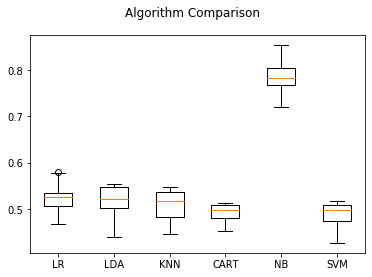

In [62]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [63]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
ensembles.append(('HGB', HistGradientBoostingClassifier()))
ensembles.append(('XGB', XGBClassifier()))
ensembles.append(('CB', CatBoostClassifier()))
ensembles.append(('LGBM', LGBMClassifier()))
ensembles.append(('MLP', MLPClassifier()))

results = []
names = []
for name, model in ensembles:
    Skfold = StratifiedKFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=Skfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg ="%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.532438 (0.035398)
GBM: 0.516434 (0.033779)
RF: 0.485007 (0.031035)
ET: 0.484345 (0.034174)
HGB: 0.514452 (0.027120)
XGB: 0.521105 (0.031764)
Learning rate set to 0.020591
0:	learn: 0.6793964	total: 136ms	remaining: 2m 16s
1:	learn: 0.6667510	total: 155ms	remaining: 1m 17s
2:	learn: 0.6544642	total: 165ms	remaining: 55s
3:	learn: 0.6424971	total: 172ms	remaining: 42.8s
4:	learn: 0.6318373	total: 179ms	remaining: 35.6s
5:	learn: 0.6212359	total: 186ms	remaining: 30.8s
6:	learn: 0.6109487	total: 190ms	remaining: 27s
7:	learn: 0.6016528	total: 197ms	remaining: 24.4s
8:	learn: 0.5933764	total: 200ms	remaining: 22s
9:	learn: 0.5849660	total: 205ms	remaining: 20.3s
10:	learn: 0.5770590	total: 211ms	remaining: 19s
11:	learn: 0.5694532	total: 216ms	remaining: 17.8s
12:	learn: 0.5617797	total: 221ms	remaining: 16.8s
13:	learn: 0.5546963	total: 227ms	remaining: 16s
14:	learn: 0.5478888	total: 231ms	remaining: 15.1s
15:	learn: 0.5419767	total: 235ms	remaining: 14.5s
16:	learn: 0.5353896	tota

200:	learn: 0.3849603	total: 1.01s	remaining: 4.03s
201:	learn: 0.3847533	total: 1.02s	remaining: 4.02s
202:	learn: 0.3846009	total: 1.02s	remaining: 4.03s
203:	learn: 0.3843733	total: 1.03s	remaining: 4.02s
204:	learn: 0.3842099	total: 1.03s	remaining: 4.01s
205:	learn: 0.3841021	total: 1.04s	remaining: 4s
206:	learn: 0.3840472	total: 1.04s	remaining: 3.99s
207:	learn: 0.3838589	total: 1.04s	remaining: 3.98s
208:	learn: 0.3836684	total: 1.05s	remaining: 3.97s
209:	learn: 0.3835451	total: 1.05s	remaining: 3.96s
210:	learn: 0.3834231	total: 1.06s	remaining: 3.95s
211:	learn: 0.3832537	total: 1.06s	remaining: 3.95s
212:	learn: 0.3831007	total: 1.06s	remaining: 3.94s
213:	learn: 0.3830255	total: 1.07s	remaining: 3.93s
214:	learn: 0.3828988	total: 1.07s	remaining: 3.92s
215:	learn: 0.3827645	total: 1.08s	remaining: 3.91s
216:	learn: 0.3826479	total: 1.08s	remaining: 3.9s
217:	learn: 0.3825006	total: 1.08s	remaining: 3.89s
218:	learn: 0.3824758	total: 1.09s	remaining: 3.88s
219:	learn: 0.38

373:	learn: 0.3618027	total: 1.71s	remaining: 2.86s
374:	learn: 0.3616054	total: 1.71s	remaining: 2.85s
375:	learn: 0.3614656	total: 1.72s	remaining: 2.85s
376:	learn: 0.3613268	total: 1.72s	remaining: 2.85s
377:	learn: 0.3611697	total: 1.73s	remaining: 2.84s
378:	learn: 0.3610419	total: 1.73s	remaining: 2.83s
379:	learn: 0.3608899	total: 1.73s	remaining: 2.83s
380:	learn: 0.3607019	total: 1.74s	remaining: 2.82s
381:	learn: 0.3606247	total: 1.74s	remaining: 2.82s
382:	learn: 0.3605205	total: 1.75s	remaining: 2.81s
383:	learn: 0.3603560	total: 1.75s	remaining: 2.81s
384:	learn: 0.3601562	total: 1.75s	remaining: 2.8s
385:	learn: 0.3600822	total: 1.76s	remaining: 2.79s
386:	learn: 0.3599928	total: 1.76s	remaining: 2.79s
387:	learn: 0.3597863	total: 1.76s	remaining: 2.78s
388:	learn: 0.3596971	total: 1.77s	remaining: 2.78s
389:	learn: 0.3595998	total: 1.77s	remaining: 2.77s
390:	learn: 0.3595502	total: 1.78s	remaining: 2.77s
391:	learn: 0.3594191	total: 1.78s	remaining: 2.76s
392:	learn: 0

549:	learn: 0.3396993	total: 2.41s	remaining: 1.97s
550:	learn: 0.3396387	total: 2.42s	remaining: 1.97s
551:	learn: 0.3395316	total: 2.42s	remaining: 1.97s
552:	learn: 0.3394133	total: 2.42s	remaining: 1.96s
553:	learn: 0.3392699	total: 2.43s	remaining: 1.96s
554:	learn: 0.3391336	total: 2.43s	remaining: 1.95s
555:	learn: 0.3390198	total: 2.44s	remaining: 1.95s
556:	learn: 0.3389132	total: 2.44s	remaining: 1.94s
557:	learn: 0.3388211	total: 2.45s	remaining: 1.94s
558:	learn: 0.3386698	total: 2.45s	remaining: 1.93s
559:	learn: 0.3384936	total: 2.45s	remaining: 1.93s
560:	learn: 0.3383966	total: 2.46s	remaining: 1.92s
561:	learn: 0.3383222	total: 2.46s	remaining: 1.92s
562:	learn: 0.3382527	total: 2.46s	remaining: 1.91s
563:	learn: 0.3381389	total: 2.47s	remaining: 1.91s
564:	learn: 0.3379838	total: 2.47s	remaining: 1.9s
565:	learn: 0.3378653	total: 2.48s	remaining: 1.9s
566:	learn: 0.3377566	total: 2.48s	remaining: 1.9s
567:	learn: 0.3376912	total: 2.48s	remaining: 1.89s
568:	learn: 0.3

725:	learn: 0.3208648	total: 3.11s	remaining: 1.17s
726:	learn: 0.3207819	total: 3.11s	remaining: 1.17s
727:	learn: 0.3207202	total: 3.12s	remaining: 1.17s
728:	learn: 0.3205354	total: 3.12s	remaining: 1.16s
729:	learn: 0.3204910	total: 3.13s	remaining: 1.16s
730:	learn: 0.3203676	total: 3.13s	remaining: 1.15s
731:	learn: 0.3202208	total: 3.14s	remaining: 1.15s
732:	learn: 0.3200988	total: 3.14s	remaining: 1.14s
733:	learn: 0.3200552	total: 3.14s	remaining: 1.14s
734:	learn: 0.3199022	total: 3.15s	remaining: 1.14s
735:	learn: 0.3198187	total: 3.15s	remaining: 1.13s
736:	learn: 0.3197333	total: 3.15s	remaining: 1.13s
737:	learn: 0.3195973	total: 3.16s	remaining: 1.12s
738:	learn: 0.3195101	total: 3.16s	remaining: 1.12s
739:	learn: 0.3194657	total: 3.17s	remaining: 1.11s
740:	learn: 0.3194021	total: 3.17s	remaining: 1.11s
741:	learn: 0.3192717	total: 3.17s	remaining: 1.1s
742:	learn: 0.3192172	total: 3.18s	remaining: 1.1s
743:	learn: 0.3191484	total: 3.18s	remaining: 1.09s
744:	learn: 0.

903:	learn: 0.3039974	total: 3.81s	remaining: 405ms
904:	learn: 0.3038893	total: 3.81s	remaining: 400ms
905:	learn: 0.3037962	total: 3.82s	remaining: 396ms
906:	learn: 0.3037515	total: 3.82s	remaining: 392ms
907:	learn: 0.3036931	total: 3.83s	remaining: 388ms
908:	learn: 0.3036188	total: 3.83s	remaining: 384ms
909:	learn: 0.3035375	total: 3.83s	remaining: 379ms
910:	learn: 0.3034077	total: 3.84s	remaining: 375ms
911:	learn: 0.3032654	total: 3.84s	remaining: 371ms
912:	learn: 0.3031559	total: 3.85s	remaining: 367ms
913:	learn: 0.3030813	total: 3.85s	remaining: 362ms
914:	learn: 0.3030140	total: 3.85s	remaining: 358ms
915:	learn: 0.3028922	total: 3.86s	remaining: 354ms
916:	learn: 0.3028365	total: 3.86s	remaining: 350ms
917:	learn: 0.3027611	total: 3.87s	remaining: 345ms
918:	learn: 0.3026601	total: 3.87s	remaining: 341ms
919:	learn: 0.3025705	total: 3.87s	remaining: 337ms
920:	learn: 0.3024722	total: 3.88s	remaining: 333ms
921:	learn: 0.3023793	total: 3.88s	remaining: 328ms
922:	learn: 

78:	learn: 0.4166476	total: 345ms	remaining: 4.02s
79:	learn: 0.4161913	total: 349ms	remaining: 4.02s
80:	learn: 0.4157974	total: 355ms	remaining: 4.03s
81:	learn: 0.4154042	total: 359ms	remaining: 4.02s
82:	learn: 0.4148203	total: 363ms	remaining: 4.01s
83:	learn: 0.4142552	total: 367ms	remaining: 4s
84:	learn: 0.4138047	total: 371ms	remaining: 4s
85:	learn: 0.4133473	total: 375ms	remaining: 3.98s
86:	learn: 0.4129424	total: 379ms	remaining: 3.98s
87:	learn: 0.4125919	total: 383ms	remaining: 3.97s
88:	learn: 0.4122051	total: 387ms	remaining: 3.96s
89:	learn: 0.4117228	total: 391ms	remaining: 3.95s
90:	learn: 0.4112715	total: 395ms	remaining: 3.94s
91:	learn: 0.4108789	total: 399ms	remaining: 3.94s
92:	learn: 0.4104021	total: 403ms	remaining: 3.93s
93:	learn: 0.4099582	total: 409ms	remaining: 3.94s
94:	learn: 0.4095018	total: 412ms	remaining: 3.93s
95:	learn: 0.4090998	total: 416ms	remaining: 3.92s
96:	learn: 0.4087418	total: 420ms	remaining: 3.91s
97:	learn: 0.4084307	total: 424ms	rem

254:	learn: 0.3767042	total: 1.04s	remaining: 3.05s
255:	learn: 0.3765547	total: 1.05s	remaining: 3.05s
256:	learn: 0.3764126	total: 1.05s	remaining: 3.05s
257:	learn: 0.3762175	total: 1.06s	remaining: 3.05s
258:	learn: 0.3760474	total: 1.06s	remaining: 3.04s
259:	learn: 0.3758170	total: 1.07s	remaining: 3.04s
260:	learn: 0.3756121	total: 1.07s	remaining: 3.03s
261:	learn: 0.3755085	total: 1.07s	remaining: 3.03s
262:	learn: 0.3753076	total: 1.08s	remaining: 3.02s
263:	learn: 0.3751833	total: 1.08s	remaining: 3.02s
264:	learn: 0.3751097	total: 1.09s	remaining: 3.01s
265:	learn: 0.3750286	total: 1.09s	remaining: 3.01s
266:	learn: 0.3748589	total: 1.09s	remaining: 3s
267:	learn: 0.3746950	total: 1.1s	remaining: 3s
268:	learn: 0.3745215	total: 1.1s	remaining: 2.99s
269:	learn: 0.3743506	total: 1.1s	remaining: 2.99s
270:	learn: 0.3741735	total: 1.11s	remaining: 2.98s
271:	learn: 0.3740374	total: 1.11s	remaining: 2.98s
272:	learn: 0.3738967	total: 1.12s	remaining: 2.98s
273:	learn: 0.3736850

429:	learn: 0.3523359	total: 1.74s	remaining: 2.31s
430:	learn: 0.3522325	total: 1.75s	remaining: 2.31s
431:	learn: 0.3521146	total: 1.75s	remaining: 2.31s
432:	learn: 0.3519451	total: 1.76s	remaining: 2.3s
433:	learn: 0.3518107	total: 1.76s	remaining: 2.3s
434:	learn: 0.3517557	total: 1.76s	remaining: 2.29s
435:	learn: 0.3516288	total: 1.77s	remaining: 2.29s
436:	learn: 0.3515086	total: 1.77s	remaining: 2.29s
437:	learn: 0.3513769	total: 1.78s	remaining: 2.28s
438:	learn: 0.3512353	total: 1.78s	remaining: 2.28s
439:	learn: 0.3511216	total: 1.78s	remaining: 2.27s
440:	learn: 0.3510237	total: 1.79s	remaining: 2.27s
441:	learn: 0.3509209	total: 1.79s	remaining: 2.26s
442:	learn: 0.3507673	total: 1.8s	remaining: 2.26s
443:	learn: 0.3505986	total: 1.8s	remaining: 2.25s
444:	learn: 0.3504061	total: 1.8s	remaining: 2.25s
445:	learn: 0.3503212	total: 1.81s	remaining: 2.25s
446:	learn: 0.3501268	total: 1.81s	remaining: 2.24s
447:	learn: 0.3500128	total: 1.82s	remaining: 2.24s
448:	learn: 0.349

603:	learn: 0.3320352	total: 2.44s	remaining: 1.6s
604:	learn: 0.3319242	total: 2.45s	remaining: 1.6s
605:	learn: 0.3318446	total: 2.45s	remaining: 1.6s
606:	learn: 0.3317689	total: 2.46s	remaining: 1.59s
607:	learn: 0.3316738	total: 2.46s	remaining: 1.59s
608:	learn: 0.3314986	total: 2.47s	remaining: 1.58s
609:	learn: 0.3313459	total: 2.47s	remaining: 1.58s
610:	learn: 0.3311644	total: 2.48s	remaining: 1.58s
611:	learn: 0.3310464	total: 2.48s	remaining: 1.57s
612:	learn: 0.3309310	total: 2.48s	remaining: 1.57s
613:	learn: 0.3308792	total: 2.49s	remaining: 1.56s
614:	learn: 0.3308102	total: 2.49s	remaining: 1.56s
615:	learn: 0.3307158	total: 2.5s	remaining: 1.55s
616:	learn: 0.3306160	total: 2.5s	remaining: 1.55s
617:	learn: 0.3305489	total: 2.5s	remaining: 1.55s
618:	learn: 0.3304630	total: 2.51s	remaining: 1.54s
619:	learn: 0.3302971	total: 2.51s	remaining: 1.54s
620:	learn: 0.3301868	total: 2.52s	remaining: 1.53s
621:	learn: 0.3300207	total: 2.52s	remaining: 1.53s
622:	learn: 0.3299

777:	learn: 0.3145741	total: 3.14s	remaining: 896ms
778:	learn: 0.3145272	total: 3.15s	remaining: 893ms
779:	learn: 0.3143805	total: 3.15s	remaining: 889ms
780:	learn: 0.3142149	total: 3.15s	remaining: 885ms
781:	learn: 0.3141271	total: 3.16s	remaining: 881ms
782:	learn: 0.3140006	total: 3.16s	remaining: 877ms
783:	learn: 0.3139138	total: 3.17s	remaining: 873ms
784:	learn: 0.3138596	total: 3.17s	remaining: 868ms
785:	learn: 0.3137494	total: 3.17s	remaining: 864ms
786:	learn: 0.3136229	total: 3.18s	remaining: 860ms
787:	learn: 0.3134492	total: 3.18s	remaining: 856ms
788:	learn: 0.3133019	total: 3.19s	remaining: 852ms
789:	learn: 0.3131819	total: 3.19s	remaining: 848ms
790:	learn: 0.3130536	total: 3.19s	remaining: 844ms
791:	learn: 0.3129373	total: 3.2s	remaining: 840ms
792:	learn: 0.3128037	total: 3.2s	remaining: 836ms
793:	learn: 0.3127065	total: 3.21s	remaining: 832ms
794:	learn: 0.3126162	total: 3.21s	remaining: 828ms
795:	learn: 0.3125269	total: 3.21s	remaining: 823ms
796:	learn: 0.

954:	learn: 0.2967123	total: 3.84s	remaining: 181ms
955:	learn: 0.2966704	total: 3.85s	remaining: 177ms
956:	learn: 0.2965757	total: 3.85s	remaining: 173ms
957:	learn: 0.2965207	total: 3.85s	remaining: 169ms
958:	learn: 0.2964056	total: 3.86s	remaining: 165ms
959:	learn: 0.2962503	total: 3.87s	remaining: 161ms
960:	learn: 0.2962090	total: 3.87s	remaining: 157ms
961:	learn: 0.2961265	total: 3.87s	remaining: 153ms
962:	learn: 0.2960545	total: 3.88s	remaining: 149ms
963:	learn: 0.2959066	total: 3.88s	remaining: 145ms
964:	learn: 0.2958555	total: 3.88s	remaining: 141ms
965:	learn: 0.2957575	total: 3.89s	remaining: 137ms
966:	learn: 0.2956914	total: 3.89s	remaining: 133ms
967:	learn: 0.2955587	total: 3.9s	remaining: 129ms
968:	learn: 0.2954978	total: 3.9s	remaining: 125ms
969:	learn: 0.2954144	total: 3.9s	remaining: 121ms
970:	learn: 0.2953457	total: 3.91s	remaining: 117ms
971:	learn: 0.2952653	total: 3.91s	remaining: 113ms
972:	learn: 0.2951823	total: 3.92s	remaining: 109ms
973:	learn: 0.2

119:	learn: 0.4000325	total: 512ms	remaining: 3.75s
120:	learn: 0.3997515	total: 521ms	remaining: 3.78s
121:	learn: 0.3994285	total: 525ms	remaining: 3.78s
122:	learn: 0.3991499	total: 529ms	remaining: 3.77s
123:	learn: 0.3988818	total: 533ms	remaining: 3.77s
124:	learn: 0.3986396	total: 537ms	remaining: 3.76s
125:	learn: 0.3983651	total: 541ms	remaining: 3.75s
126:	learn: 0.3981104	total: 544ms	remaining: 3.74s
127:	learn: 0.3978684	total: 548ms	remaining: 3.74s
128:	learn: 0.3976806	total: 552ms	remaining: 3.73s
129:	learn: 0.3973385	total: 556ms	remaining: 3.72s
130:	learn: 0.3969904	total: 560ms	remaining: 3.71s
131:	learn: 0.3967054	total: 564ms	remaining: 3.71s
132:	learn: 0.3964899	total: 568ms	remaining: 3.7s
133:	learn: 0.3962216	total: 572ms	remaining: 3.69s
134:	learn: 0.3959130	total: 575ms	remaining: 3.69s
135:	learn: 0.3957413	total: 579ms	remaining: 3.68s
136:	learn: 0.3956784	total: 582ms	remaining: 3.66s
137:	learn: 0.3954338	total: 585ms	remaining: 3.65s
138:	learn: 0

290:	learn: 0.3690828	total: 1.21s	remaining: 2.94s
291:	learn: 0.3689746	total: 1.21s	remaining: 2.94s
292:	learn: 0.3688257	total: 1.22s	remaining: 2.93s
293:	learn: 0.3686362	total: 1.22s	remaining: 2.93s
294:	learn: 0.3685275	total: 1.23s	remaining: 2.93s
295:	learn: 0.3683956	total: 1.23s	remaining: 2.92s
296:	learn: 0.3682384	total: 1.23s	remaining: 2.92s
297:	learn: 0.3680460	total: 1.24s	remaining: 2.92s
298:	learn: 0.3679405	total: 1.24s	remaining: 2.91s
299:	learn: 0.3678216	total: 1.25s	remaining: 2.91s
300:	learn: 0.3675829	total: 1.25s	remaining: 2.9s
301:	learn: 0.3674999	total: 1.25s	remaining: 2.9s
302:	learn: 0.3673086	total: 1.26s	remaining: 2.9s
303:	learn: 0.3672280	total: 1.26s	remaining: 2.89s
304:	learn: 0.3670993	total: 1.27s	remaining: 2.89s
305:	learn: 0.3669576	total: 1.27s	remaining: 2.88s
306:	learn: 0.3668540	total: 1.27s	remaining: 2.88s
307:	learn: 0.3666846	total: 1.28s	remaining: 2.87s
308:	learn: 0.3666091	total: 1.28s	remaining: 2.87s
309:	learn: 0.3

456:	learn: 0.3473754	total: 1.9s	remaining: 2.26s
457:	learn: 0.3471517	total: 1.9s	remaining: 2.25s
458:	learn: 0.3470209	total: 1.91s	remaining: 2.26s
459:	learn: 0.3468549	total: 1.92s	remaining: 2.25s
460:	learn: 0.3467697	total: 1.92s	remaining: 2.25s
461:	learn: 0.3466112	total: 1.93s	remaining: 2.24s
462:	learn: 0.3464789	total: 1.93s	remaining: 2.24s
463:	learn: 0.3463688	total: 1.93s	remaining: 2.23s
464:	learn: 0.3462434	total: 1.94s	remaining: 2.23s
465:	learn: 0.3461326	total: 1.95s	remaining: 2.23s
466:	learn: 0.3459923	total: 1.95s	remaining: 2.22s
467:	learn: 0.3458087	total: 1.95s	remaining: 2.22s
468:	learn: 0.3457212	total: 1.96s	remaining: 2.22s
469:	learn: 0.3455704	total: 1.96s	remaining: 2.21s
470:	learn: 0.3454946	total: 1.97s	remaining: 2.21s
471:	learn: 0.3453656	total: 1.97s	remaining: 2.2s
472:	learn: 0.3452486	total: 1.97s	remaining: 2.2s
473:	learn: 0.3450846	total: 1.98s	remaining: 2.19s
474:	learn: 0.3450070	total: 1.98s	remaining: 2.19s
475:	learn: 0.34

622:	learn: 0.3258084	total: 2.6s	remaining: 1.57s
623:	learn: 0.3256690	total: 2.6s	remaining: 1.57s
624:	learn: 0.3255506	total: 2.61s	remaining: 1.56s
625:	learn: 0.3254140	total: 2.61s	remaining: 1.56s
626:	learn: 0.3253182	total: 2.62s	remaining: 1.56s
627:	learn: 0.3252143	total: 2.62s	remaining: 1.55s
628:	learn: 0.3251003	total: 2.62s	remaining: 1.55s
629:	learn: 0.3250030	total: 2.63s	remaining: 1.54s
630:	learn: 0.3248275	total: 2.63s	remaining: 1.54s
631:	learn: 0.3247299	total: 2.64s	remaining: 1.53s
632:	learn: 0.3246796	total: 2.64s	remaining: 1.53s
633:	learn: 0.3245804	total: 2.64s	remaining: 1.53s
634:	learn: 0.3244307	total: 2.65s	remaining: 1.52s
635:	learn: 0.3243115	total: 2.65s	remaining: 1.52s
636:	learn: 0.3241881	total: 2.65s	remaining: 1.51s
637:	learn: 0.3241274	total: 2.66s	remaining: 1.51s
638:	learn: 0.3240596	total: 2.66s	remaining: 1.5s
639:	learn: 0.3240037	total: 2.67s	remaining: 1.5s
640:	learn: 0.3239607	total: 2.67s	remaining: 1.5s
641:	learn: 0.323

787:	learn: 0.3083021	total: 3.29s	remaining: 886ms
788:	learn: 0.3082136	total: 3.3s	remaining: 882ms
789:	learn: 0.3081677	total: 3.3s	remaining: 877ms
790:	learn: 0.3080573	total: 3.31s	remaining: 874ms
791:	learn: 0.3078886	total: 3.31s	remaining: 870ms
792:	learn: 0.3078015	total: 3.31s	remaining: 866ms
793:	learn: 0.3077115	total: 3.32s	remaining: 861ms
794:	learn: 0.3075889	total: 3.32s	remaining: 857ms
795:	learn: 0.3074484	total: 3.33s	remaining: 853ms
796:	learn: 0.3073820	total: 3.33s	remaining: 849ms
797:	learn: 0.3072689	total: 3.34s	remaining: 845ms
798:	learn: 0.3071275	total: 3.34s	remaining: 840ms
799:	learn: 0.3070444	total: 3.34s	remaining: 836ms
800:	learn: 0.3069654	total: 3.35s	remaining: 832ms
801:	learn: 0.3068638	total: 3.35s	remaining: 828ms
802:	learn: 0.3067506	total: 3.35s	remaining: 823ms
803:	learn: 0.3066776	total: 3.36s	remaining: 819ms
804:	learn: 0.3066135	total: 3.36s	remaining: 815ms
805:	learn: 0.3064769	total: 3.37s	remaining: 810ms
806:	learn: 0.

956:	learn: 0.2926293	total: 3.99s	remaining: 179ms
957:	learn: 0.2925541	total: 4s	remaining: 175ms
958:	learn: 0.2924873	total: 4s	remaining: 171ms
959:	learn: 0.2923916	total: 4s	remaining: 167ms
960:	learn: 0.2923161	total: 4.01s	remaining: 163ms
961:	learn: 0.2922458	total: 4.01s	remaining: 159ms
962:	learn: 0.2921884	total: 4.02s	remaining: 154ms
963:	learn: 0.2921457	total: 4.02s	remaining: 150ms
964:	learn: 0.2920733	total: 4.02s	remaining: 146ms
965:	learn: 0.2920030	total: 4.03s	remaining: 142ms
966:	learn: 0.2919101	total: 4.03s	remaining: 138ms
967:	learn: 0.2918591	total: 4.04s	remaining: 133ms
968:	learn: 0.2917407	total: 4.04s	remaining: 129ms
969:	learn: 0.2916667	total: 4.04s	remaining: 125ms
970:	learn: 0.2915642	total: 4.05s	remaining: 121ms
971:	learn: 0.2915169	total: 4.05s	remaining: 117ms
972:	learn: 0.2914316	total: 4.05s	remaining: 113ms
973:	learn: 0.2913101	total: 4.06s	remaining: 108ms
974:	learn: 0.2912423	total: 4.06s	remaining: 104ms
975:	learn: 0.2911760

125:	learn: 0.3988381	total: 524ms	remaining: 3.63s
126:	learn: 0.3985226	total: 529ms	remaining: 3.64s
127:	learn: 0.3981456	total: 534ms	remaining: 3.64s
128:	learn: 0.3979649	total: 539ms	remaining: 3.64s
129:	learn: 0.3976332	total: 543ms	remaining: 3.63s
130:	learn: 0.3973704	total: 546ms	remaining: 3.62s
131:	learn: 0.3971519	total: 550ms	remaining: 3.62s
132:	learn: 0.3968886	total: 555ms	remaining: 3.62s
133:	learn: 0.3965710	total: 559ms	remaining: 3.61s
134:	learn: 0.3963059	total: 563ms	remaining: 3.61s
135:	learn: 0.3960185	total: 567ms	remaining: 3.6s
136:	learn: 0.3957677	total: 572ms	remaining: 3.6s
137:	learn: 0.3955315	total: 576ms	remaining: 3.6s
138:	learn: 0.3952731	total: 580ms	remaining: 3.59s
139:	learn: 0.3950821	total: 584ms	remaining: 3.58s
140:	learn: 0.3948677	total: 588ms	remaining: 3.58s
141:	learn: 0.3946594	total: 591ms	remaining: 3.57s
142:	learn: 0.3944231	total: 596ms	remaining: 3.57s
143:	learn: 0.3943459	total: 599ms	remaining: 3.56s
144:	learn: 0.3

292:	learn: 0.3702045	total: 1.22s	remaining: 2.94s
293:	learn: 0.3700397	total: 1.22s	remaining: 2.94s
294:	learn: 0.3698368	total: 1.23s	remaining: 2.94s
295:	learn: 0.3696935	total: 1.24s	remaining: 2.94s
296:	learn: 0.3695826	total: 1.24s	remaining: 2.94s
297:	learn: 0.3694557	total: 1.25s	remaining: 2.95s
298:	learn: 0.3693579	total: 1.25s	remaining: 2.94s
299:	learn: 0.3692246	total: 1.26s	remaining: 2.94s
300:	learn: 0.3691258	total: 1.26s	remaining: 2.93s
301:	learn: 0.3689609	total: 1.27s	remaining: 2.93s
302:	learn: 0.3687740	total: 1.27s	remaining: 2.93s
303:	learn: 0.3686186	total: 1.28s	remaining: 2.92s
304:	learn: 0.3685550	total: 1.28s	remaining: 2.93s
305:	learn: 0.3683568	total: 1.29s	remaining: 2.92s
306:	learn: 0.3682240	total: 1.29s	remaining: 2.92s
307:	learn: 0.3681077	total: 1.3s	remaining: 2.92s
308:	learn: 0.3679096	total: 1.3s	remaining: 2.91s
309:	learn: 0.3677531	total: 1.31s	remaining: 2.91s
310:	learn: 0.3676381	total: 1.31s	remaining: 2.9s
311:	learn: 0.3

493:	learn: 0.3425521	total: 2.08s	remaining: 2.13s
494:	learn: 0.3424411	total: 2.09s	remaining: 2.13s
495:	learn: 0.3423523	total: 2.09s	remaining: 2.13s
496:	learn: 0.3422441	total: 2.1s	remaining: 2.12s
497:	learn: 0.3421573	total: 2.1s	remaining: 2.12s
498:	learn: 0.3420462	total: 2.11s	remaining: 2.12s
499:	learn: 0.3419297	total: 2.11s	remaining: 2.11s
500:	learn: 0.3418218	total: 2.11s	remaining: 2.11s
501:	learn: 0.3416929	total: 2.12s	remaining: 2.1s
502:	learn: 0.3416029	total: 2.12s	remaining: 2.1s
503:	learn: 0.3415066	total: 2.13s	remaining: 2.09s
504:	learn: 0.3413610	total: 2.13s	remaining: 2.09s
505:	learn: 0.3412361	total: 2.13s	remaining: 2.08s
506:	learn: 0.3411035	total: 2.14s	remaining: 2.08s
507:	learn: 0.3410304	total: 2.14s	remaining: 2.07s
508:	learn: 0.3409056	total: 2.15s	remaining: 2.07s
509:	learn: 0.3407565	total: 2.15s	remaining: 2.06s
510:	learn: 0.3405860	total: 2.15s	remaining: 2.06s
511:	learn: 0.3404753	total: 2.16s	remaining: 2.06s
512:	learn: 0.34

669:	learn: 0.3233111	total: 2.79s	remaining: 1.37s
670:	learn: 0.3231517	total: 2.79s	remaining: 1.37s
671:	learn: 0.3230275	total: 2.8s	remaining: 1.36s
672:	learn: 0.3229545	total: 2.8s	remaining: 1.36s
673:	learn: 0.3228936	total: 2.81s	remaining: 1.36s
674:	learn: 0.3227550	total: 2.81s	remaining: 1.35s
675:	learn: 0.3226843	total: 2.81s	remaining: 1.35s
676:	learn: 0.3225930	total: 2.82s	remaining: 1.34s
677:	learn: 0.3224667	total: 2.82s	remaining: 1.34s
678:	learn: 0.3223638	total: 2.82s	remaining: 1.33s
679:	learn: 0.3223241	total: 2.83s	remaining: 1.33s
680:	learn: 0.3222072	total: 2.83s	remaining: 1.33s
681:	learn: 0.3221999	total: 2.83s	remaining: 1.32s
682:	learn: 0.3220412	total: 2.84s	remaining: 1.32s
683:	learn: 0.3219255	total: 2.84s	remaining: 1.31s
684:	learn: 0.3218353	total: 2.85s	remaining: 1.31s
685:	learn: 0.3216518	total: 2.85s	remaining: 1.3s
686:	learn: 0.3214828	total: 2.85s	remaining: 1.3s
687:	learn: 0.3213512	total: 2.86s	remaining: 1.29s
688:	learn: 0.32

840:	learn: 0.3066835	total: 3.48s	remaining: 658ms
841:	learn: 0.3065688	total: 3.48s	remaining: 654ms
842:	learn: 0.3063949	total: 3.49s	remaining: 650ms
843:	learn: 0.3063183	total: 3.49s	remaining: 646ms
844:	learn: 0.3061929	total: 3.5s	remaining: 642ms
845:	learn: 0.3061264	total: 3.5s	remaining: 638ms
846:	learn: 0.3060380	total: 3.51s	remaining: 633ms
847:	learn: 0.3060062	total: 3.51s	remaining: 629ms
848:	learn: 0.3059176	total: 3.52s	remaining: 625ms
849:	learn: 0.3058214	total: 3.52s	remaining: 621ms
850:	learn: 0.3056990	total: 3.52s	remaining: 617ms
851:	learn: 0.3056471	total: 3.53s	remaining: 613ms
852:	learn: 0.3055228	total: 3.53s	remaining: 609ms
853:	learn: 0.3053831	total: 3.54s	remaining: 605ms
854:	learn: 0.3052745	total: 3.54s	remaining: 600ms
855:	learn: 0.3051352	total: 3.54s	remaining: 596ms
856:	learn: 0.3050896	total: 3.55s	remaining: 592ms
857:	learn: 0.3049939	total: 3.55s	remaining: 588ms
858:	learn: 0.3049124	total: 3.56s	remaining: 584ms
859:	learn: 0.

Learning rate set to 0.020591
0:	learn: 0.6791257	total: 3.83ms	remaining: 3.83s
1:	learn: 0.6663202	total: 7.78ms	remaining: 3.88s
2:	learn: 0.6535735	total: 11.7ms	remaining: 3.9s
3:	learn: 0.6411399	total: 15.6ms	remaining: 3.87s
4:	learn: 0.6301115	total: 19.4ms	remaining: 3.86s
5:	learn: 0.6194276	total: 23.3ms	remaining: 3.86s
6:	learn: 0.6096110	total: 26.7ms	remaining: 3.78s
7:	learn: 0.6002708	total: 30.9ms	remaining: 3.83s
8:	learn: 0.5917129	total: 34.8ms	remaining: 3.83s
9:	learn: 0.5823634	total: 39ms	remaining: 3.86s
10:	learn: 0.5745973	total: 42.8ms	remaining: 3.85s
11:	learn: 0.5668044	total: 47ms	remaining: 3.87s
12:	learn: 0.5590878	total: 50.8ms	remaining: 3.86s
13:	learn: 0.5522049	total: 54.7ms	remaining: 3.85s
14:	learn: 0.5455158	total: 58.6ms	remaining: 3.85s
15:	learn: 0.5388624	total: 62.5ms	remaining: 3.85s
16:	learn: 0.5332633	total: 66.5ms	remaining: 3.84s
17:	learn: 0.5274527	total: 70.5ms	remaining: 3.84s
18:	learn: 0.5223999	total: 74.4ms	remaining: 3.8

172:	learn: 0.3870035	total: 693ms	remaining: 3.31s
173:	learn: 0.3868559	total: 697ms	remaining: 3.31s
174:	learn: 0.3866742	total: 702ms	remaining: 3.31s
175:	learn: 0.3864895	total: 707ms	remaining: 3.31s
176:	learn: 0.3863396	total: 713ms	remaining: 3.31s
177:	learn: 0.3861371	total: 718ms	remaining: 3.31s
178:	learn: 0.3858855	total: 721ms	remaining: 3.31s
179:	learn: 0.3857022	total: 725ms	remaining: 3.3s
180:	learn: 0.3853975	total: 729ms	remaining: 3.3s
181:	learn: 0.3852590	total: 734ms	remaining: 3.3s
182:	learn: 0.3850861	total: 737ms	remaining: 3.29s
183:	learn: 0.3848057	total: 741ms	remaining: 3.29s
184:	learn: 0.3845981	total: 745ms	remaining: 3.28s
185:	learn: 0.3843562	total: 749ms	remaining: 3.28s
186:	learn: 0.3840582	total: 753ms	remaining: 3.27s
187:	learn: 0.3839278	total: 757ms	remaining: 3.27s
188:	learn: 0.3836646	total: 761ms	remaining: 3.27s
189:	learn: 0.3834683	total: 767ms	remaining: 3.27s
190:	learn: 0.3833637	total: 771ms	remaining: 3.26s
191:	learn: 0.3

346:	learn: 0.3618866	total: 1.39s	remaining: 2.62s
347:	learn: 0.3618272	total: 1.39s	remaining: 2.61s
348:	learn: 0.3617022	total: 1.4s	remaining: 2.61s
349:	learn: 0.3614563	total: 1.41s	remaining: 2.61s
350:	learn: 0.3613136	total: 1.41s	remaining: 2.61s
351:	learn: 0.3610861	total: 1.42s	remaining: 2.6s
352:	learn: 0.3609931	total: 1.42s	remaining: 2.6s
353:	learn: 0.3608552	total: 1.42s	remaining: 2.6s
354:	learn: 0.3607438	total: 1.43s	remaining: 2.59s
355:	learn: 0.3606530	total: 1.43s	remaining: 2.59s
356:	learn: 0.3604874	total: 1.44s	remaining: 2.58s
357:	learn: 0.3603761	total: 1.44s	remaining: 2.58s
358:	learn: 0.3602836	total: 1.44s	remaining: 2.58s
359:	learn: 0.3601117	total: 1.45s	remaining: 2.57s
360:	learn: 0.3599783	total: 1.45s	remaining: 2.57s
361:	learn: 0.3598947	total: 1.45s	remaining: 2.56s
362:	learn: 0.3597706	total: 1.46s	remaining: 2.56s
363:	learn: 0.3596602	total: 1.46s	remaining: 2.56s
364:	learn: 0.3594809	total: 1.47s	remaining: 2.55s
365:	learn: 0.35

514:	learn: 0.3395516	total: 2.09s	remaining: 1.97s
515:	learn: 0.3394287	total: 2.1s	remaining: 1.97s
516:	learn: 0.3392973	total: 2.1s	remaining: 1.96s
517:	learn: 0.3391445	total: 2.1s	remaining: 1.96s
518:	learn: 0.3389955	total: 2.11s	remaining: 1.95s
519:	learn: 0.3388404	total: 2.11s	remaining: 1.95s
520:	learn: 0.3387212	total: 2.12s	remaining: 1.95s
521:	learn: 0.3386639	total: 2.12s	remaining: 1.94s
522:	learn: 0.3385163	total: 2.13s	remaining: 1.94s
523:	learn: 0.3384120	total: 2.13s	remaining: 1.93s
524:	learn: 0.3383288	total: 2.13s	remaining: 1.93s
525:	learn: 0.3381508	total: 2.14s	remaining: 1.93s
526:	learn: 0.3380518	total: 2.14s	remaining: 1.92s
527:	learn: 0.3378684	total: 2.15s	remaining: 1.92s
528:	learn: 0.3377682	total: 2.15s	remaining: 1.91s
529:	learn: 0.3375757	total: 2.15s	remaining: 1.91s
530:	learn: 0.3374503	total: 2.16s	remaining: 1.91s
531:	learn: 0.3373262	total: 2.16s	remaining: 1.9s
532:	learn: 0.3372150	total: 2.16s	remaining: 1.9s
533:	learn: 0.337

685:	learn: 0.3187405	total: 2.79s	remaining: 1.27s
686:	learn: 0.3186257	total: 2.79s	remaining: 1.27s
687:	learn: 0.3184489	total: 2.79s	remaining: 1.27s
688:	learn: 0.3183818	total: 2.8s	remaining: 1.26s
689:	learn: 0.3182564	total: 2.81s	remaining: 1.26s
690:	learn: 0.3181888	total: 2.81s	remaining: 1.26s
691:	learn: 0.3180470	total: 2.81s	remaining: 1.25s
692:	learn: 0.3179698	total: 2.82s	remaining: 1.25s
693:	learn: 0.3178571	total: 2.82s	remaining: 1.25s
694:	learn: 0.3177869	total: 2.83s	remaining: 1.24s
695:	learn: 0.3176575	total: 2.83s	remaining: 1.24s
696:	learn: 0.3175166	total: 2.83s	remaining: 1.23s
697:	learn: 0.3173679	total: 2.84s	remaining: 1.23s
698:	learn: 0.3171841	total: 2.84s	remaining: 1.22s
699:	learn: 0.3171189	total: 2.85s	remaining: 1.22s
700:	learn: 0.3169749	total: 2.85s	remaining: 1.22s
701:	learn: 0.3169159	total: 2.85s	remaining: 1.21s
702:	learn: 0.3168099	total: 2.86s	remaining: 1.21s
703:	learn: 0.3166720	total: 2.86s	remaining: 1.2s
704:	learn: 0.

856:	learn: 0.3016753	total: 3.48s	remaining: 581ms
857:	learn: 0.3015238	total: 3.49s	remaining: 577ms
858:	learn: 0.3014119	total: 3.49s	remaining: 573ms
859:	learn: 0.3012727	total: 3.5s	remaining: 569ms
860:	learn: 0.3011419	total: 3.5s	remaining: 566ms
861:	learn: 0.3010301	total: 3.51s	remaining: 562ms
862:	learn: 0.3009883	total: 3.51s	remaining: 557ms
863:	learn: 0.3009479	total: 3.52s	remaining: 553ms
864:	learn: 0.3008284	total: 3.52s	remaining: 549ms
865:	learn: 0.3007703	total: 3.52s	remaining: 545ms
866:	learn: 0.3007283	total: 3.53s	remaining: 541ms
867:	learn: 0.3006357	total: 3.53s	remaining: 537ms
868:	learn: 0.3005940	total: 3.53s	remaining: 533ms
869:	learn: 0.3004482	total: 3.54s	remaining: 529ms
870:	learn: 0.3003257	total: 3.54s	remaining: 525ms
871:	learn: 0.3002216	total: 3.54s	remaining: 520ms
872:	learn: 0.3001638	total: 3.55s	remaining: 516ms
873:	learn: 0.3001080	total: 3.55s	remaining: 512ms
874:	learn: 0.2999763	total: 3.56s	remaining: 508ms
875:	learn: 0.

43:	learn: 0.4513239	total: 179ms	remaining: 3.89s
44:	learn: 0.4497682	total: 183ms	remaining: 3.89s
45:	learn: 0.4483148	total: 189ms	remaining: 3.91s
46:	learn: 0.4470596	total: 194ms	remaining: 3.94s
47:	learn: 0.4455037	total: 200ms	remaining: 3.96s
48:	learn: 0.4441005	total: 204ms	remaining: 3.96s
49:	learn: 0.4425928	total: 208ms	remaining: 3.95s
50:	learn: 0.4412316	total: 213ms	remaining: 3.96s
51:	learn: 0.4401726	total: 217ms	remaining: 3.96s
52:	learn: 0.4388128	total: 221ms	remaining: 3.95s
53:	learn: 0.4376807	total: 227ms	remaining: 3.97s
54:	learn: 0.4363504	total: 231ms	remaining: 3.97s
55:	learn: 0.4352339	total: 235ms	remaining: 3.96s
56:	learn: 0.4343366	total: 239ms	remaining: 3.96s
57:	learn: 0.4331108	total: 243ms	remaining: 3.95s
58:	learn: 0.4321663	total: 247ms	remaining: 3.94s
59:	learn: 0.4311736	total: 251ms	remaining: 3.94s
60:	learn: 0.4301804	total: 255ms	remaining: 3.93s
61:	learn: 0.4294502	total: 259ms	remaining: 3.92s
62:	learn: 0.4286187	total: 264

208:	learn: 0.3839832	total: 870ms	remaining: 3.29s
209:	learn: 0.3838435	total: 875ms	remaining: 3.29s
210:	learn: 0.3837031	total: 881ms	remaining: 3.29s
211:	learn: 0.3835666	total: 885ms	remaining: 3.29s
212:	learn: 0.3833486	total: 889ms	remaining: 3.28s
213:	learn: 0.3832291	total: 892ms	remaining: 3.28s
214:	learn: 0.3830467	total: 896ms	remaining: 3.27s
215:	learn: 0.3829291	total: 900ms	remaining: 3.27s
216:	learn: 0.3828418	total: 904ms	remaining: 3.26s
217:	learn: 0.3825691	total: 908ms	remaining: 3.26s
218:	learn: 0.3824246	total: 912ms	remaining: 3.25s
219:	learn: 0.3822793	total: 916ms	remaining: 3.25s
220:	learn: 0.3821483	total: 920ms	remaining: 3.24s
221:	learn: 0.3820251	total: 923ms	remaining: 3.24s
222:	learn: 0.3818227	total: 927ms	remaining: 3.23s
223:	learn: 0.3816161	total: 931ms	remaining: 3.23s
224:	learn: 0.3814416	total: 935ms	remaining: 3.22s
225:	learn: 0.3812387	total: 939ms	remaining: 3.21s
226:	learn: 0.3811394	total: 943ms	remaining: 3.21s
227:	learn: 

382:	learn: 0.3603359	total: 1.57s	remaining: 2.53s
383:	learn: 0.3602379	total: 1.57s	remaining: 2.53s
384:	learn: 0.3601199	total: 1.58s	remaining: 2.52s
385:	learn: 0.3599247	total: 1.58s	remaining: 2.52s
386:	learn: 0.3597160	total: 1.59s	remaining: 2.52s
387:	learn: 0.3595797	total: 1.6s	remaining: 2.52s
388:	learn: 0.3594077	total: 1.6s	remaining: 2.51s
389:	learn: 0.3592789	total: 1.6s	remaining: 2.51s
390:	learn: 0.3591619	total: 1.61s	remaining: 2.5s
391:	learn: 0.3590865	total: 1.61s	remaining: 2.5s
392:	learn: 0.3589565	total: 1.62s	remaining: 2.5s
393:	learn: 0.3588687	total: 1.62s	remaining: 2.49s
394:	learn: 0.3587584	total: 1.62s	remaining: 2.49s
395:	learn: 0.3586800	total: 1.63s	remaining: 2.48s
396:	learn: 0.3585897	total: 1.63s	remaining: 2.48s
397:	learn: 0.3583735	total: 1.64s	remaining: 2.47s
398:	learn: 0.3583210	total: 1.64s	remaining: 2.47s
399:	learn: 0.3581565	total: 1.64s	remaining: 2.46s
400:	learn: 0.3580342	total: 1.65s	remaining: 2.46s
401:	learn: 0.3579

557:	learn: 0.3371056	total: 2.27s	remaining: 1.8s
558:	learn: 0.3370092	total: 2.28s	remaining: 1.8s
559:	learn: 0.3369291	total: 2.29s	remaining: 1.8s
560:	learn: 0.3367750	total: 2.29s	remaining: 1.79s
561:	learn: 0.3366868	total: 2.29s	remaining: 1.79s
562:	learn: 0.3365751	total: 2.3s	remaining: 1.78s
563:	learn: 0.3364485	total: 2.3s	remaining: 1.78s
564:	learn: 0.3362861	total: 2.31s	remaining: 1.78s
565:	learn: 0.3361043	total: 2.31s	remaining: 1.77s
566:	learn: 0.3359881	total: 2.31s	remaining: 1.77s
567:	learn: 0.3358411	total: 2.32s	remaining: 1.76s
568:	learn: 0.3356721	total: 2.32s	remaining: 1.76s
569:	learn: 0.3355824	total: 2.33s	remaining: 1.75s
570:	learn: 0.3354593	total: 2.33s	remaining: 1.75s
571:	learn: 0.3353214	total: 2.33s	remaining: 1.75s
572:	learn: 0.3351993	total: 2.34s	remaining: 1.74s
573:	learn: 0.3350841	total: 2.34s	remaining: 1.74s
574:	learn: 0.3349896	total: 2.35s	remaining: 1.73s
575:	learn: 0.3348812	total: 2.35s	remaining: 1.73s
576:	learn: 0.334

733:	learn: 0.3172578	total: 2.98s	remaining: 1.08s
734:	learn: 0.3171475	total: 2.98s	remaining: 1.07s
735:	learn: 0.3170787	total: 2.99s	remaining: 1.07s
736:	learn: 0.3169737	total: 2.99s	remaining: 1.07s
737:	learn: 0.3168493	total: 2.99s	remaining: 1.06s
738:	learn: 0.3167020	total: 3s	remaining: 1.06s
739:	learn: 0.3166375	total: 3s	remaining: 1.05s
740:	learn: 0.3165354	total: 3.01s	remaining: 1.05s
741:	learn: 0.3164768	total: 3.01s	remaining: 1.05s
742:	learn: 0.3163960	total: 3.01s	remaining: 1.04s
743:	learn: 0.3163114	total: 3.02s	remaining: 1.04s
744:	learn: 0.3162247	total: 3.02s	remaining: 1.03s
745:	learn: 0.3161332	total: 3.03s	remaining: 1.03s
746:	learn: 0.3160575	total: 3.03s	remaining: 1.03s
747:	learn: 0.3159923	total: 3.03s	remaining: 1.02s
748:	learn: 0.3158964	total: 3.04s	remaining: 1.02s
749:	learn: 0.3157596	total: 3.04s	remaining: 1.01s
750:	learn: 0.3156690	total: 3.04s	remaining: 1.01s
751:	learn: 0.3155565	total: 3.05s	remaining: 1s
752:	learn: 0.3154846

909:	learn: 0.2998472	total: 3.68s	remaining: 364ms
910:	learn: 0.2997398	total: 3.68s	remaining: 360ms
911:	learn: 0.2995934	total: 3.69s	remaining: 356ms
912:	learn: 0.2995054	total: 3.69s	remaining: 352ms
913:	learn: 0.2994043	total: 3.69s	remaining: 348ms
914:	learn: 0.2992992	total: 3.7s	remaining: 344ms
915:	learn: 0.2992709	total: 3.7s	remaining: 340ms
916:	learn: 0.2991067	total: 3.71s	remaining: 336ms
917:	learn: 0.2989757	total: 3.71s	remaining: 332ms
918:	learn: 0.2988450	total: 3.71s	remaining: 328ms
919:	learn: 0.2988140	total: 3.72s	remaining: 323ms
920:	learn: 0.2987398	total: 3.72s	remaining: 319ms
921:	learn: 0.2986439	total: 3.73s	remaining: 315ms
922:	learn: 0.2986292	total: 3.73s	remaining: 311ms
923:	learn: 0.2985036	total: 3.73s	remaining: 307ms
924:	learn: 0.2984326	total: 3.74s	remaining: 303ms
925:	learn: 0.2983232	total: 3.74s	remaining: 299ms
926:	learn: 0.2982653	total: 3.75s	remaining: 295ms
927:	learn: 0.2982096	total: 3.75s	remaining: 291ms
928:	learn: 0.

81:	learn: 0.4115706	total: 341ms	remaining: 3.81s
82:	learn: 0.4110757	total: 345ms	remaining: 3.81s
83:	learn: 0.4104099	total: 349ms	remaining: 3.81s
84:	learn: 0.4098921	total: 354ms	remaining: 3.81s
85:	learn: 0.4094543	total: 359ms	remaining: 3.81s
86:	learn: 0.4089139	total: 365ms	remaining: 3.83s
87:	learn: 0.4084610	total: 369ms	remaining: 3.83s
88:	learn: 0.4080433	total: 373ms	remaining: 3.82s
89:	learn: 0.4075945	total: 377ms	remaining: 3.81s
90:	learn: 0.4070135	total: 381ms	remaining: 3.81s
91:	learn: 0.4066853	total: 386ms	remaining: 3.81s
92:	learn: 0.4063004	total: 390ms	remaining: 3.8s
93:	learn: 0.4058319	total: 393ms	remaining: 3.79s
94:	learn: 0.4054416	total: 397ms	remaining: 3.78s
95:	learn: 0.4050522	total: 401ms	remaining: 3.78s
96:	learn: 0.4046590	total: 405ms	remaining: 3.77s
97:	learn: 0.4043106	total: 409ms	remaining: 3.76s
98:	learn: 0.4037975	total: 413ms	remaining: 3.75s
99:	learn: 0.4033466	total: 417ms	remaining: 3.75s
100:	learn: 0.4030528	total: 420

254:	learn: 0.3725667	total: 1.04s	remaining: 3.04s
255:	learn: 0.3724781	total: 1.04s	remaining: 3.03s
256:	learn: 0.3724360	total: 1.05s	remaining: 3.03s
257:	learn: 0.3722054	total: 1.05s	remaining: 3.03s
258:	learn: 0.3720536	total: 1.06s	remaining: 3.02s
259:	learn: 0.3719545	total: 1.06s	remaining: 3.02s
260:	learn: 0.3716869	total: 1.07s	remaining: 3.02s
261:	learn: 0.3715204	total: 1.07s	remaining: 3.02s
262:	learn: 0.3713848	total: 1.07s	remaining: 3.01s
263:	learn: 0.3711335	total: 1.08s	remaining: 3.01s
264:	learn: 0.3710194	total: 1.08s	remaining: 3s
265:	learn: 0.3708051	total: 1.09s	remaining: 3s
266:	learn: 0.3706960	total: 1.09s	remaining: 2.99s
267:	learn: 0.3705812	total: 1.09s	remaining: 2.99s
268:	learn: 0.3703746	total: 1.1s	remaining: 2.99s
269:	learn: 0.3702283	total: 1.1s	remaining: 2.98s
270:	learn: 0.3700590	total: 1.11s	remaining: 2.98s
271:	learn: 0.3699158	total: 1.11s	remaining: 2.97s
272:	learn: 0.3696174	total: 1.11s	remaining: 2.97s
273:	learn: 0.369509

443:	learn: 0.3462026	total: 1.9s	remaining: 2.38s
444:	learn: 0.3460723	total: 1.91s	remaining: 2.38s
445:	learn: 0.3459514	total: 1.91s	remaining: 2.38s
446:	learn: 0.3457711	total: 1.92s	remaining: 2.37s
447:	learn: 0.3456961	total: 1.92s	remaining: 2.37s
448:	learn: 0.3455540	total: 1.93s	remaining: 2.37s
449:	learn: 0.3453970	total: 1.93s	remaining: 2.36s
450:	learn: 0.3452609	total: 1.94s	remaining: 2.36s
451:	learn: 0.3451025	total: 1.94s	remaining: 2.35s
452:	learn: 0.3450332	total: 1.95s	remaining: 2.35s
453:	learn: 0.3449420	total: 1.95s	remaining: 2.34s
454:	learn: 0.3447908	total: 1.95s	remaining: 2.34s
455:	learn: 0.3446888	total: 1.96s	remaining: 2.34s
456:	learn: 0.3445200	total: 1.96s	remaining: 2.33s
457:	learn: 0.3444432	total: 1.97s	remaining: 2.33s
458:	learn: 0.3443106	total: 1.97s	remaining: 2.32s
459:	learn: 0.3441865	total: 1.98s	remaining: 2.32s
460:	learn: 0.3440050	total: 1.98s	remaining: 2.31s
461:	learn: 0.3438466	total: 1.98s	remaining: 2.31s
462:	learn: 0

607:	learn: 0.3247245	total: 2.6s	remaining: 1.67s
608:	learn: 0.3246260	total: 2.6s	remaining: 1.67s
609:	learn: 0.3245020	total: 2.6s	remaining: 1.67s
610:	learn: 0.3243653	total: 2.61s	remaining: 1.66s
611:	learn: 0.3242163	total: 2.61s	remaining: 1.66s
612:	learn: 0.3241250	total: 2.62s	remaining: 1.65s
613:	learn: 0.3240098	total: 2.62s	remaining: 1.65s
614:	learn: 0.3239084	total: 2.63s	remaining: 1.64s
615:	learn: 0.3238333	total: 2.63s	remaining: 1.64s
616:	learn: 0.3236518	total: 2.63s	remaining: 1.64s
617:	learn: 0.3235816	total: 2.64s	remaining: 1.63s
618:	learn: 0.3235023	total: 2.64s	remaining: 1.63s
619:	learn: 0.3233073	total: 2.65s	remaining: 1.62s
620:	learn: 0.3232476	total: 2.65s	remaining: 1.62s
621:	learn: 0.3231366	total: 2.66s	remaining: 1.61s
622:	learn: 0.3230470	total: 2.66s	remaining: 1.61s
623:	learn: 0.3229615	total: 2.66s	remaining: 1.6s
624:	learn: 0.3228333	total: 2.67s	remaining: 1.6s
625:	learn: 0.3227496	total: 2.67s	remaining: 1.6s
626:	learn: 0.3226

776:	learn: 0.3070828	total: 3.29s	remaining: 945ms
777:	learn: 0.3069920	total: 3.29s	remaining: 940ms
778:	learn: 0.3069061	total: 3.3s	remaining: 936ms
779:	learn: 0.3068411	total: 3.3s	remaining: 932ms
780:	learn: 0.3067641	total: 3.31s	remaining: 927ms
781:	learn: 0.3066461	total: 3.31s	remaining: 923ms
782:	learn: 0.3066077	total: 3.31s	remaining: 919ms
783:	learn: 0.3065232	total: 3.32s	remaining: 916ms
784:	learn: 0.3064099	total: 3.33s	remaining: 913ms
785:	learn: 0.3063150	total: 3.34s	remaining: 910ms
786:	learn: 0.3062209	total: 3.35s	remaining: 906ms
787:	learn: 0.3060910	total: 3.35s	remaining: 902ms
788:	learn: 0.3060127	total: 3.35s	remaining: 897ms
789:	learn: 0.3059478	total: 3.36s	remaining: 893ms
790:	learn: 0.3057521	total: 3.37s	remaining: 889ms
791:	learn: 0.3056927	total: 3.37s	remaining: 885ms
792:	learn: 0.3055660	total: 3.37s	remaining: 881ms
793:	learn: 0.3054811	total: 3.38s	remaining: 877ms
794:	learn: 0.3054164	total: 3.38s	remaining: 873ms
795:	learn: 0.

938:	learn: 0.2924232	total: 4.34s	remaining: 282ms
939:	learn: 0.2923685	total: 4.35s	remaining: 278ms
940:	learn: 0.2923157	total: 4.36s	remaining: 273ms
941:	learn: 0.2922166	total: 4.36s	remaining: 269ms
942:	learn: 0.2921131	total: 4.37s	remaining: 264ms
943:	learn: 0.2920194	total: 4.39s	remaining: 261ms
944:	learn: 0.2919311	total: 4.41s	remaining: 257ms
945:	learn: 0.2918505	total: 4.42s	remaining: 252ms
946:	learn: 0.2917726	total: 4.44s	remaining: 249ms
947:	learn: 0.2917230	total: 4.45s	remaining: 244ms
948:	learn: 0.2916701	total: 4.45s	remaining: 239ms
949:	learn: 0.2915661	total: 4.46s	remaining: 235ms
950:	learn: 0.2914423	total: 4.46s	remaining: 230ms
951:	learn: 0.2913606	total: 4.47s	remaining: 225ms
952:	learn: 0.2912151	total: 4.48s	remaining: 221ms
953:	learn: 0.2911428	total: 4.48s	remaining: 216ms
954:	learn: 0.2910157	total: 4.49s	remaining: 211ms
955:	learn: 0.2909070	total: 4.49s	remaining: 207ms
956:	learn: 0.2908371	total: 4.5s	remaining: 202ms
957:	learn: 0

116:	learn: 0.4025855	total: 517ms	remaining: 3.9s
117:	learn: 0.4023570	total: 521ms	remaining: 3.89s
118:	learn: 0.4021016	total: 525ms	remaining: 3.88s
119:	learn: 0.4018384	total: 529ms	remaining: 3.88s
120:	learn: 0.4015095	total: 533ms	remaining: 3.87s
121:	learn: 0.4012505	total: 538ms	remaining: 3.87s
122:	learn: 0.4009592	total: 542ms	remaining: 3.86s
123:	learn: 0.4007633	total: 546ms	remaining: 3.85s
124:	learn: 0.4004332	total: 550ms	remaining: 3.85s
125:	learn: 0.4002184	total: 553ms	remaining: 3.84s
126:	learn: 0.4000151	total: 557ms	remaining: 3.83s
127:	learn: 0.3997720	total: 561ms	remaining: 3.82s
128:	learn: 0.3995177	total: 565ms	remaining: 3.82s
129:	learn: 0.3991912	total: 569ms	remaining: 3.81s
130:	learn: 0.3989796	total: 573ms	remaining: 3.8s
131:	learn: 0.3988008	total: 577ms	remaining: 3.79s
132:	learn: 0.3986495	total: 581ms	remaining: 3.79s
133:	learn: 0.3984030	total: 585ms	remaining: 3.78s
134:	learn: 0.3982188	total: 589ms	remaining: 3.77s
135:	learn: 0.

279:	learn: 0.3736316	total: 1.21s	remaining: 3.11s
280:	learn: 0.3734643	total: 1.21s	remaining: 3.1s
281:	learn: 0.3732610	total: 1.22s	remaining: 3.1s
282:	learn: 0.3731098	total: 1.22s	remaining: 3.1s
283:	learn: 0.3729731	total: 1.23s	remaining: 3.09s
284:	learn: 0.3728901	total: 1.23s	remaining: 3.09s
285:	learn: 0.3727972	total: 1.23s	remaining: 3.08s
286:	learn: 0.3725240	total: 1.24s	remaining: 3.08s
287:	learn: 0.3724435	total: 1.24s	remaining: 3.07s
288:	learn: 0.3723970	total: 1.25s	remaining: 3.06s
289:	learn: 0.3723379	total: 1.25s	remaining: 3.06s
290:	learn: 0.3721067	total: 1.25s	remaining: 3.05s
291:	learn: 0.3720081	total: 1.26s	remaining: 3.05s
292:	learn: 0.3718681	total: 1.26s	remaining: 3.04s
293:	learn: 0.3717277	total: 1.26s	remaining: 3.04s
294:	learn: 0.3715831	total: 1.27s	remaining: 3.03s
295:	learn: 0.3714244	total: 1.27s	remaining: 3.03s
296:	learn: 0.3713381	total: 1.28s	remaining: 3.02s
297:	learn: 0.3712595	total: 1.28s	remaining: 3.02s
298:	learn: 0.3

448:	learn: 0.3509693	total: 1.9s	remaining: 2.34s
449:	learn: 0.3507988	total: 1.91s	remaining: 2.33s
450:	learn: 0.3506430	total: 1.91s	remaining: 2.33s
451:	learn: 0.3505551	total: 1.92s	remaining: 2.32s
452:	learn: 0.3503226	total: 1.92s	remaining: 2.32s
453:	learn: 0.3502186	total: 1.92s	remaining: 2.31s
454:	learn: 0.3500915	total: 1.93s	remaining: 2.31s
455:	learn: 0.3499226	total: 1.93s	remaining: 2.3s
456:	learn: 0.3497599	total: 1.94s	remaining: 2.3s
457:	learn: 0.3496130	total: 1.94s	remaining: 2.29s
458:	learn: 0.3494958	total: 1.94s	remaining: 2.29s
459:	learn: 0.3494193	total: 1.95s	remaining: 2.29s
460:	learn: 0.3493398	total: 1.95s	remaining: 2.28s
461:	learn: 0.3491901	total: 1.96s	remaining: 2.28s
462:	learn: 0.3490619	total: 1.96s	remaining: 2.27s
463:	learn: 0.3489338	total: 1.96s	remaining: 2.27s
464:	learn: 0.3487629	total: 1.97s	remaining: 2.26s
465:	learn: 0.3485862	total: 1.97s	remaining: 2.26s
466:	learn: 0.3484885	total: 1.97s	remaining: 2.25s
467:	learn: 0.3

617:	learn: 0.3309356	total: 2.6s	remaining: 1.61s
618:	learn: 0.3308411	total: 2.6s	remaining: 1.6s
619:	learn: 0.3307222	total: 2.61s	remaining: 1.6s
620:	learn: 0.3305415	total: 2.61s	remaining: 1.59s
621:	learn: 0.3303986	total: 2.62s	remaining: 1.59s
622:	learn: 0.3302083	total: 2.63s	remaining: 1.59s
623:	learn: 0.3300765	total: 2.63s	remaining: 1.58s
624:	learn: 0.3300021	total: 2.63s	remaining: 1.58s
625:	learn: 0.3298717	total: 2.64s	remaining: 1.58s
626:	learn: 0.3297865	total: 2.64s	remaining: 1.57s
627:	learn: 0.3296592	total: 2.65s	remaining: 1.57s
628:	learn: 0.3295641	total: 2.65s	remaining: 1.56s
629:	learn: 0.3294018	total: 2.65s	remaining: 1.56s
630:	learn: 0.3293364	total: 2.66s	remaining: 1.55s
631:	learn: 0.3292213	total: 2.66s	remaining: 1.55s
632:	learn: 0.3291434	total: 2.67s	remaining: 1.55s
633:	learn: 0.3290387	total: 2.67s	remaining: 1.54s
634:	learn: 0.3288811	total: 2.67s	remaining: 1.54s
635:	learn: 0.3288187	total: 2.68s	remaining: 1.53s
636:	learn: 0.32

780:	learn: 0.3131919	total: 3.3s	remaining: 926ms
781:	learn: 0.3131295	total: 3.31s	remaining: 922ms
782:	learn: 0.3130633	total: 3.31s	remaining: 917ms
783:	learn: 0.3130146	total: 3.31s	remaining: 913ms
784:	learn: 0.3128864	total: 3.32s	remaining: 909ms
785:	learn: 0.3127505	total: 3.33s	remaining: 906ms
786:	learn: 0.3126512	total: 3.33s	remaining: 901ms
787:	learn: 0.3125048	total: 3.34s	remaining: 898ms
788:	learn: 0.3124633	total: 3.34s	remaining: 894ms
789:	learn: 0.3123879	total: 3.35s	remaining: 889ms
790:	learn: 0.3122464	total: 3.35s	remaining: 885ms
791:	learn: 0.3121711	total: 3.36s	remaining: 881ms
792:	learn: 0.3119923	total: 3.36s	remaining: 877ms
793:	learn: 0.3118731	total: 3.37s	remaining: 873ms
794:	learn: 0.3117985	total: 3.37s	remaining: 869ms
795:	learn: 0.3117357	total: 3.37s	remaining: 865ms
796:	learn: 0.3115961	total: 3.38s	remaining: 861ms
797:	learn: 0.3114602	total: 3.39s	remaining: 857ms
798:	learn: 0.3113505	total: 3.39s	remaining: 853ms
799:	learn: 0

947:	learn: 0.2972183	total: 4s	remaining: 219ms
948:	learn: 0.2970601	total: 4s	remaining: 215ms
949:	learn: 0.2969612	total: 4s	remaining: 211ms
950:	learn: 0.2967997	total: 4.01s	remaining: 207ms
951:	learn: 0.2967527	total: 4.01s	remaining: 202ms
952:	learn: 0.2966100	total: 4.02s	remaining: 198ms
953:	learn: 0.2965437	total: 4.02s	remaining: 194ms
954:	learn: 0.2964745	total: 4.03s	remaining: 190ms
955:	learn: 0.2963570	total: 4.03s	remaining: 186ms
956:	learn: 0.2962328	total: 4.04s	remaining: 181ms
957:	learn: 0.2961723	total: 4.04s	remaining: 177ms
958:	learn: 0.2960841	total: 4.04s	remaining: 173ms
959:	learn: 0.2960382	total: 4.05s	remaining: 169ms
960:	learn: 0.2959079	total: 4.05s	remaining: 164ms
961:	learn: 0.2957995	total: 4.05s	remaining: 160ms
962:	learn: 0.2957020	total: 4.06s	remaining: 156ms
963:	learn: 0.2956016	total: 4.06s	remaining: 152ms
964:	learn: 0.2955159	total: 4.07s	remaining: 147ms
965:	learn: 0.2954568	total: 4.07s	remaining: 143ms
966:	learn: 0.2953718

121:	learn: 0.3979683	total: 518ms	remaining: 3.73s
122:	learn: 0.3978018	total: 522ms	remaining: 3.72s
123:	learn: 0.3975149	total: 526ms	remaining: 3.72s
124:	learn: 0.3973185	total: 530ms	remaining: 3.71s
125:	learn: 0.3970004	total: 535ms	remaining: 3.71s
126:	learn: 0.3966579	total: 540ms	remaining: 3.71s
127:	learn: 0.3963844	total: 546ms	remaining: 3.72s
128:	learn: 0.3961295	total: 550ms	remaining: 3.71s
129:	learn: 0.3958936	total: 554ms	remaining: 3.71s
130:	learn: 0.3957089	total: 558ms	remaining: 3.7s
131:	learn: 0.3955593	total: 562ms	remaining: 3.69s
132:	learn: 0.3953736	total: 566ms	remaining: 3.69s
133:	learn: 0.3951818	total: 569ms	remaining: 3.68s
134:	learn: 0.3949623	total: 573ms	remaining: 3.67s
135:	learn: 0.3947521	total: 577ms	remaining: 3.67s
136:	learn: 0.3946654	total: 581ms	remaining: 3.66s
137:	learn: 0.3944711	total: 584ms	remaining: 3.65s
138:	learn: 0.3941830	total: 588ms	remaining: 3.64s
139:	learn: 0.3938097	total: 592ms	remaining: 3.64s
140:	learn: 0

294:	learn: 0.3675300	total: 1.22s	remaining: 2.91s
295:	learn: 0.3673629	total: 1.22s	remaining: 2.91s
296:	learn: 0.3672167	total: 1.23s	remaining: 2.9s
297:	learn: 0.3670868	total: 1.23s	remaining: 2.9s
298:	learn: 0.3670215	total: 1.23s	remaining: 2.89s
299:	learn: 0.3668802	total: 1.24s	remaining: 2.89s
300:	learn: 0.3667054	total: 1.24s	remaining: 2.88s
301:	learn: 0.3666008	total: 1.25s	remaining: 2.88s
302:	learn: 0.3664149	total: 1.25s	remaining: 2.87s
303:	learn: 0.3663316	total: 1.25s	remaining: 2.87s
304:	learn: 0.3661600	total: 1.26s	remaining: 2.87s
305:	learn: 0.3659708	total: 1.26s	remaining: 2.86s
306:	learn: 0.3658294	total: 1.26s	remaining: 2.86s
307:	learn: 0.3657339	total: 1.27s	remaining: 2.86s
308:	learn: 0.3655794	total: 1.27s	remaining: 2.85s
309:	learn: 0.3654788	total: 1.28s	remaining: 2.85s
310:	learn: 0.3653538	total: 1.28s	remaining: 2.84s
311:	learn: 0.3652021	total: 1.29s	remaining: 2.84s
312:	learn: 0.3650755	total: 1.29s	remaining: 2.83s
313:	learn: 0.

468:	learn: 0.3447696	total: 1.92s	remaining: 2.17s
469:	learn: 0.3445466	total: 1.92s	remaining: 2.17s
470:	learn: 0.3444494	total: 1.92s	remaining: 2.16s
471:	learn: 0.3442855	total: 1.93s	remaining: 2.16s
472:	learn: 0.3440708	total: 1.93s	remaining: 2.15s
473:	learn: 0.3439611	total: 1.94s	remaining: 2.15s
474:	learn: 0.3438022	total: 1.94s	remaining: 2.14s
475:	learn: 0.3437085	total: 1.94s	remaining: 2.14s
476:	learn: 0.3436094	total: 1.95s	remaining: 2.13s
477:	learn: 0.3434358	total: 1.95s	remaining: 2.13s
478:	learn: 0.3432674	total: 1.95s	remaining: 2.13s
479:	learn: 0.3431244	total: 1.96s	remaining: 2.12s
480:	learn: 0.3429504	total: 1.96s	remaining: 2.12s
481:	learn: 0.3428707	total: 1.97s	remaining: 2.11s
482:	learn: 0.3427276	total: 1.97s	remaining: 2.11s
483:	learn: 0.3426460	total: 1.97s	remaining: 2.1s
484:	learn: 0.3425592	total: 1.98s	remaining: 2.1s
485:	learn: 0.3424070	total: 1.98s	remaining: 2.1s
486:	learn: 0.3422771	total: 1.99s	remaining: 2.09s
487:	learn: 0.3

647:	learn: 0.3240346	total: 2.62s	remaining: 1.42s
648:	learn: 0.3239842	total: 2.62s	remaining: 1.42s
649:	learn: 0.3239230	total: 2.63s	remaining: 1.41s
650:	learn: 0.3238624	total: 2.63s	remaining: 1.41s
651:	learn: 0.3237706	total: 2.63s	remaining: 1.41s
652:	learn: 0.3236294	total: 2.64s	remaining: 1.4s
653:	learn: 0.3235868	total: 2.64s	remaining: 1.4s
654:	learn: 0.3235020	total: 2.65s	remaining: 1.39s
655:	learn: 0.3233913	total: 2.65s	remaining: 1.39s
656:	learn: 0.3232565	total: 2.65s	remaining: 1.39s
657:	learn: 0.3231982	total: 2.66s	remaining: 1.38s
658:	learn: 0.3231075	total: 2.66s	remaining: 1.38s
659:	learn: 0.3230073	total: 2.67s	remaining: 1.37s
660:	learn: 0.3228325	total: 2.67s	remaining: 1.37s
661:	learn: 0.3227333	total: 2.67s	remaining: 1.36s
662:	learn: 0.3225937	total: 2.68s	remaining: 1.36s
663:	learn: 0.3224664	total: 2.68s	remaining: 1.36s
664:	learn: 0.3223341	total: 2.69s	remaining: 1.35s
665:	learn: 0.3221982	total: 2.69s	remaining: 1.35s
666:	learn: 0.

823:	learn: 0.3049414	total: 3.32s	remaining: 710ms
824:	learn: 0.3048924	total: 3.33s	remaining: 706ms
825:	learn: 0.3048349	total: 3.33s	remaining: 702ms
826:	learn: 0.3047319	total: 3.33s	remaining: 698ms
827:	learn: 0.3045931	total: 3.34s	remaining: 694ms
828:	learn: 0.3045085	total: 3.34s	remaining: 690ms
829:	learn: 0.3043466	total: 3.35s	remaining: 685ms
830:	learn: 0.3042145	total: 3.35s	remaining: 681ms
831:	learn: 0.3041351	total: 3.35s	remaining: 677ms
832:	learn: 0.3039773	total: 3.36s	remaining: 673ms
833:	learn: 0.3038527	total: 3.36s	remaining: 669ms
834:	learn: 0.3038001	total: 3.37s	remaining: 665ms
835:	learn: 0.3037611	total: 3.37s	remaining: 661ms
836:	learn: 0.3037205	total: 3.37s	remaining: 657ms
837:	learn: 0.3036784	total: 3.38s	remaining: 653ms
838:	learn: 0.3036084	total: 3.38s	remaining: 649ms
839:	learn: 0.3035379	total: 3.39s	remaining: 645ms
840:	learn: 0.3034136	total: 3.39s	remaining: 641ms
841:	learn: 0.3033175	total: 3.39s	remaining: 637ms
842:	learn: 

995:	learn: 0.2889017	total: 4.02s	remaining: 16.1ms
996:	learn: 0.2888197	total: 4.02s	remaining: 12.1ms
997:	learn: 0.2886935	total: 4.03s	remaining: 8.07ms
998:	learn: 0.2885697	total: 4.03s	remaining: 4.03ms
999:	learn: 0.2884661	total: 4.03s	remaining: 0us
Learning rate set to 0.020593
0:	learn: 0.6791785	total: 3.9ms	remaining: 3.9s
1:	learn: 0.6667124	total: 8.09ms	remaining: 4.04s
2:	learn: 0.6543304	total: 12.2ms	remaining: 4.06s
3:	learn: 0.6420721	total: 16.1ms	remaining: 4.02s
4:	learn: 0.6313102	total: 20.1ms	remaining: 3.99s
5:	learn: 0.6207123	total: 25.6ms	remaining: 4.24s
6:	learn: 0.6109635	total: 31.1ms	remaining: 4.41s
7:	learn: 0.6017621	total: 37ms	remaining: 4.58s
8:	learn: 0.5933084	total: 41.2ms	remaining: 4.54s
9:	learn: 0.5841717	total: 45.4ms	remaining: 4.5s
10:	learn: 0.5759761	total: 49.5ms	remaining: 4.45s
11:	learn: 0.5681912	total: 53.5ms	remaining: 4.41s
12:	learn: 0.5606507	total: 57.6ms	remaining: 4.37s
13:	learn: 0.5539716	total: 61.6ms	remaining: 4

175:	learn: 0.3885257	total: 703ms	remaining: 3.29s
176:	learn: 0.3883388	total: 707ms	remaining: 3.29s
177:	learn: 0.3880610	total: 711ms	remaining: 3.28s
178:	learn: 0.3878342	total: 715ms	remaining: 3.28s
179:	learn: 0.3875836	total: 719ms	remaining: 3.27s
180:	learn: 0.3873977	total: 723ms	remaining: 3.27s
181:	learn: 0.3870915	total: 726ms	remaining: 3.27s
182:	learn: 0.3869317	total: 730ms	remaining: 3.26s
183:	learn: 0.3868688	total: 734ms	remaining: 3.26s
184:	learn: 0.3864535	total: 738ms	remaining: 3.25s
185:	learn: 0.3862630	total: 742ms	remaining: 3.25s
186:	learn: 0.3860913	total: 746ms	remaining: 3.24s
187:	learn: 0.3858248	total: 750ms	remaining: 3.24s
188:	learn: 0.3857298	total: 754ms	remaining: 3.23s
189:	learn: 0.3855757	total: 757ms	remaining: 3.23s
190:	learn: 0.3854171	total: 761ms	remaining: 3.22s
191:	learn: 0.3853214	total: 765ms	remaining: 3.22s
192:	learn: 0.3849997	total: 769ms	remaining: 3.21s
193:	learn: 0.3848435	total: 773ms	remaining: 3.21s
194:	learn: 

363:	learn: 0.3611119	total: 1.57s	remaining: 2.74s
364:	learn: 0.3609636	total: 1.57s	remaining: 2.74s
365:	learn: 0.3608608	total: 1.58s	remaining: 2.74s
366:	learn: 0.3607165	total: 1.59s	remaining: 2.75s
367:	learn: 0.3606013	total: 1.6s	remaining: 2.75s
368:	learn: 0.3604964	total: 1.61s	remaining: 2.75s
369:	learn: 0.3603508	total: 1.61s	remaining: 2.74s
370:	learn: 0.3602155	total: 1.62s	remaining: 2.74s
371:	learn: 0.3601661	total: 1.64s	remaining: 2.76s
372:	learn: 0.3600932	total: 1.64s	remaining: 2.76s
373:	learn: 0.3600222	total: 1.64s	remaining: 2.75s
374:	learn: 0.3598540	total: 1.65s	remaining: 2.75s
375:	learn: 0.3597012	total: 1.66s	remaining: 2.75s
376:	learn: 0.3595659	total: 1.66s	remaining: 2.74s
377:	learn: 0.3594222	total: 1.67s	remaining: 2.75s
378:	learn: 0.3593081	total: 1.68s	remaining: 2.75s
379:	learn: 0.3591362	total: 1.68s	remaining: 2.74s
380:	learn: 0.3590329	total: 1.69s	remaining: 2.74s
381:	learn: 0.3589509	total: 1.69s	remaining: 2.73s
382:	learn: 0

535:	learn: 0.3387282	total: 2.44s	remaining: 2.11s
536:	learn: 0.3386382	total: 2.44s	remaining: 2.11s
537:	learn: 0.3385431	total: 2.45s	remaining: 2.1s
538:	learn: 0.3383414	total: 2.45s	remaining: 2.1s
539:	learn: 0.3382167	total: 2.45s	remaining: 2.09s
540:	learn: 0.3381026	total: 2.46s	remaining: 2.08s
541:	learn: 0.3379661	total: 2.46s	remaining: 2.08s
542:	learn: 0.3378692	total: 2.47s	remaining: 2.08s
543:	learn: 0.3377852	total: 2.47s	remaining: 2.07s
544:	learn: 0.3376885	total: 2.47s	remaining: 2.06s
545:	learn: 0.3374441	total: 2.48s	remaining: 2.06s
546:	learn: 0.3373002	total: 2.48s	remaining: 2.06s
547:	learn: 0.3371624	total: 2.48s	remaining: 2.05s
548:	learn: 0.3370691	total: 2.49s	remaining: 2.04s
549:	learn: 0.3369431	total: 2.49s	remaining: 2.04s
550:	learn: 0.3368552	total: 2.5s	remaining: 2.04s
551:	learn: 0.3367129	total: 2.5s	remaining: 2.03s
552:	learn: 0.3365729	total: 2.5s	remaining: 2.02s
553:	learn: 0.3364597	total: 2.51s	remaining: 2.02s
554:	learn: 0.336

715:	learn: 0.3175854	total: 3.14s	remaining: 1.25s
716:	learn: 0.3174931	total: 3.14s	remaining: 1.24s
717:	learn: 0.3174308	total: 3.15s	remaining: 1.24s
718:	learn: 0.3173030	total: 3.15s	remaining: 1.23s
719:	learn: 0.3172031	total: 3.15s	remaining: 1.23s
720:	learn: 0.3170929	total: 3.16s	remaining: 1.22s
721:	learn: 0.3169857	total: 3.16s	remaining: 1.22s
722:	learn: 0.3168787	total: 3.17s	remaining: 1.21s
723:	learn: 0.3168043	total: 3.17s	remaining: 1.21s
724:	learn: 0.3166915	total: 3.17s	remaining: 1.2s
725:	learn: 0.3165469	total: 3.18s	remaining: 1.2s
726:	learn: 0.3164227	total: 3.18s	remaining: 1.19s
727:	learn: 0.3163106	total: 3.19s	remaining: 1.19s
728:	learn: 0.3162302	total: 3.19s	remaining: 1.19s
729:	learn: 0.3161650	total: 3.19s	remaining: 1.18s
730:	learn: 0.3160868	total: 3.2s	remaining: 1.18s
731:	learn: 0.3160022	total: 3.2s	remaining: 1.17s
732:	learn: 0.3158159	total: 3.2s	remaining: 1.17s
733:	learn: 0.3157168	total: 3.21s	remaining: 1.16s
734:	learn: 0.315

895:	learn: 0.2994679	total: 3.84s	remaining: 446ms
896:	learn: 0.2993377	total: 3.84s	remaining: 441ms
897:	learn: 0.2993363	total: 3.85s	remaining: 437ms
898:	learn: 0.2992763	total: 3.85s	remaining: 432ms
899:	learn: 0.2991820	total: 3.85s	remaining: 428ms
900:	learn: 0.2990651	total: 3.86s	remaining: 424ms
901:	learn: 0.2989998	total: 3.86s	remaining: 419ms
902:	learn: 0.2989466	total: 3.86s	remaining: 415ms
903:	learn: 0.2989453	total: 3.87s	remaining: 411ms
904:	learn: 0.2988326	total: 3.87s	remaining: 406ms
905:	learn: 0.2987833	total: 3.87s	remaining: 402ms
906:	learn: 0.2986915	total: 3.88s	remaining: 398ms
907:	learn: 0.2985978	total: 3.88s	remaining: 393ms
908:	learn: 0.2985092	total: 3.89s	remaining: 389ms
909:	learn: 0.2983819	total: 3.89s	remaining: 385ms
910:	learn: 0.2982693	total: 3.89s	remaining: 380ms
911:	learn: 0.2982115	total: 3.9s	remaining: 376ms
912:	learn: 0.2980592	total: 3.9s	remaining: 372ms
913:	learn: 0.2979688	total: 3.9s	remaining: 367ms
914:	learn: 0.2

D:\Anaconda3\envs\fastai_v1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\envs\fastai_v1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\envs\fastai_v1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\envs\fastai_v1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.ma

MLP: 0.518425 (0.028654)


D:\Anaconda3\envs\fastai_v1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


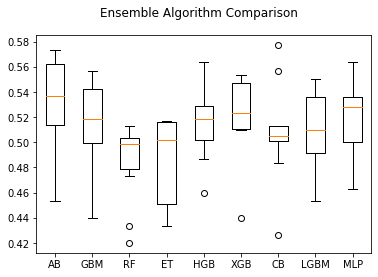

In [64]:
#CompareAlgorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [66]:
# prepare the model
model = GaussianNB()
model.fit(X_train, Y_train)

#estimate accuracy on test dataset
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.7491115849324804
[[757 276]
 [ 77 297]]
              precision    recall  f1-score   support

         0.0       0.91      0.73      0.81      1033
         1.0       0.52      0.79      0.63       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.76      1407



In [67]:
import pickle

filename = 'final_model_GaussianNB.sav'
pickle.dump(model, open(filename, 'wb'))